In [1]:
# importing libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# reading the data 

potatoInfo = pd.read_excel("2_Data_Files.xlsx",
                           sheet_name='Potatoes_Info')
clientInfo = pd.read_excel("2_Data_Files.xlsx", 
                           sheet_name='Client_Info')
potatoPositions = pd.read_excel("2_Data_Files.xlsx",
                                sheet_name='Potatoes_Positions')

In [3]:
# Data Cleaning 
potatoPositions = potatoPositions[potatoPositions['Quantity'] !='[NULL]']
potatoPositions.Quantity = potatoPositions.Quantity.astype('int')
potatoPositions = potatoPositions[potatoPositions.Quantity > 0]

potatoPositions['MktValue'] = potatoPositions.Quantity * potatoPositions.Price

# Removing two outliers
potatoPositions = potatoPositions[potatoPositions.Quantity != max(potatoPositions.Quantity)]

In [4]:
## 1 Clients with largest stockpile of potates based on market value. 
top10MktValue = pd.DataFrame( potatoPositions.groupby('Client ID')
                             ['MktValue'].agg('sum').sort_values(ascending = False).head(10))
top10MktValue.reset_index(inplace = True)

## Top 10 clients by Market Value
pd.merge(left=clientInfo,right= top10MktValue,how = 'inner', left_on='Client ID', 
         right_on = 'Client ID').sort_values('MktValue', ascending = False)


,Client ID,First Name,Last Name,Client Type,Client Location,MktValue
2,38,Jamel,Caruso,Industrial,Midwest,4.099853e+09
0,27,Destiny,Aldridge,Industrial,Midwest,3.453458e+09
3,82,Samuel,Cheney,Organic,Northeast,3.813384e+08
8,74,Nakisha,Southerland,Industrial,Northeast,2.535433e+08
4,30,Eulalia,Culver,Industrial,Midwest,1.786158e+08
7,89,Tammera,Lassiter,Industrial,Northeast,7.700075e+07
5,44,Jeremy,Kong,Traditional,West,6.828753e+07
6,50,Landon,Kyle,Hydroponitc,North,4.778522e+07
1,94,Valeri,Burchfield,Industrial,Northeast,4.741919e+07
9,17,Chan,Vue,Industrial,Midwest,3.886684e+07


In [5]:
## 2  Most Active Clients ( determined on basis of total number of trades during the period)
activeClients = potatoPositions['Client ID'].value_counts().sort_values(
    ascending=False).head(10)

## Top10 most active clients 
clientInfo[clientInfo['Client ID'].isin(activeClients.index)]


,Client ID,First Name,Last Name,Client Type,Client Location
1,27,Destiny,Aldridge,Industrial,Midwest
11,94,Valeri,Burchfield,Industrial,Northeast
14,38,Jamel,Caruso,Industrial,Midwest
19,30,Eulalia,Culver,Industrial,Midwest
32,64,Mariko,Giles,Organic,North
53,44,Jeremy,Kong,Traditional,West
54,50,Landon,Kyle,Hydroponitc,North
58,89,Tammera,Lassiter,Industrial,Northeast
88,74,Nakisha,Southerland,Industrial,Northeast
95,17,Chan,Vue,Industrial,Midwest


In [6]:
## 3  Most Active Potatoes 
activePotatoes = potatoPositions['Product ID'].value_counts().sort_values(
    ascending=False).head(5)

## Top 5  most active potatoes 
potatoInfo[potatoInfo['Product ID'].isin(activePotatoes.index)]


,Product ID,Variety Name,Country,Shape of tuber,Colour of skin,Colour of flesh,Depth of eyes,Smoothness of skin,Colour of base of lightsprout,Maturity,Height of plants,Frequency of berries
9,10,Amorosa,UNITED KINGDOM,Oval - long,Red,Medium yellow,Shallow,Medium,Pink,Early,-,Many
15,16,Argos,UNITED KINGDOM,Oval - long,Cream,Cream,Shallow,Smooth,Blue,Intermediate to late,Medium,Few
44,45,British Queen,-,Short - oval,Cream,Cream,Shallow - medium,Medium,Pink,Early to intermediate,-,Few
92,93,Edzell Blue,-,Short - oval,Blue,Cream,-,Medium,Blue,Intermediate,-,Absent
171,172,Lorimer,UNITED KINGDOM,Short - oval,White,Cream,Shallow,-,Blue,-,Short - medium,-


In [7]:
## removing the outliers for exploring the trend 
zscoreQty = stats.zscore(potatoPositions.Quantity)
positionInfoclean = potatoPositions[list(zscoreQty < 3)]
## Exploring client accounts related trend 
allData = pd.merge(positionInfoclean, clientInfo, 
                   left_on='Client ID', right_on= 'Client ID')


potatoAllData = pd.merge(positionInfoclean, potatoInfo, 
                   left_on='Product ID', right_on= 'Product ID')

clientTypeqty = pd.DataFrame(allData.groupby(['Date','Client Type'])
                             ['Quantity'].agg('sum'))
clientRegionqty = pd.DataFrame(allData.groupby(['Date','Client Location'])
                               ['Quantity'].agg('sum'))

Text(0.5, 1.0, 'Quantities by Client Type')

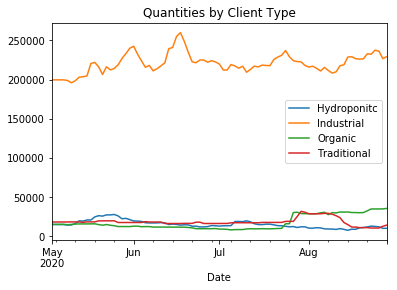

In [8]:
## Exploring trends based on client
temp = clientTypeqty.unstack(level = 1)
temp.columns = ['Hydroponitc','Industrial','Organic','Traditional']
temp.plot()
plt.title('Quantities by Client Type')

Text(0.5, 1.0, 'Quantities traded by Each Region')

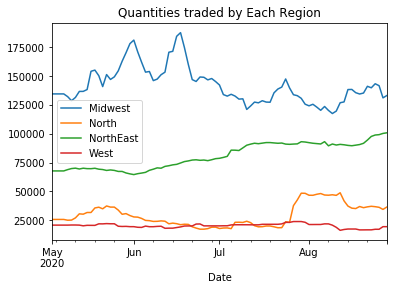

In [9]:
temp = clientRegionqty.unstack(level = 1)
temp.columns = ['Midwest','North','NorthEast','West']
temp.plot()
plt.title('Quantities traded by Each Region')

Text(0.5, 1.0, 'Total Quantities traded along with weekly average')

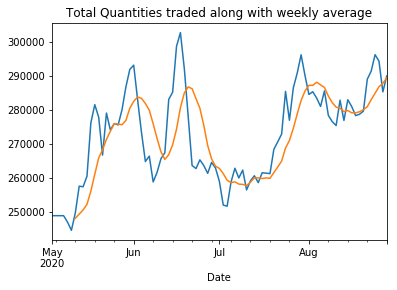

In [10]:
# Trend of total quantities traded over time 
temp = allData.groupby('Date')['Quantity'].agg('sum')
ma7 = temp.rolling(7).mean()

temp.plot()
ma7.plot()
plt.title('Total Quantities traded along with weekly average')

Text(0.5, 1.0, 'Overall Avg price of Potatoes over time')

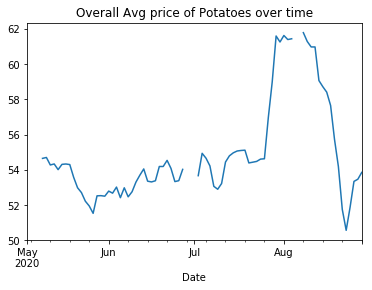

In [11]:
# Potato price trends 

overallAvgPrice = allData.groupby('Date').apply(lambda x : sum(x['MktValue'] /sum(x['Quantity'])))
overallAvgPrice.plot()
plt.title('Overall Avg price of Potatoes over time')



Text(0.5, 1.0, 'Weighted Avg price per day for top 5 potato types')

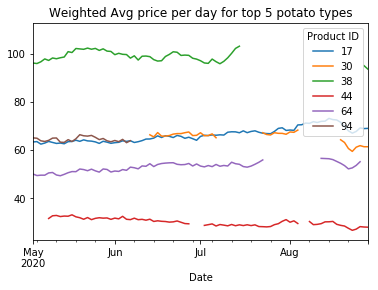

In [12]:
# price trends for top 5 most active potatoes 
top5 = potatoInfo[potatoInfo['Product ID'].isin(activeClients.index)]['Product ID']

top5WAP = potatoAllData[potatoAllData['Product ID'].isin(top5)].groupby(
    ['Date','Product ID']).apply(lambda x : sum(x['MktValue']) / sum(x['Quantity'])).unstack(level = 1)

top5WAP.plot()
plt.title('Weighted Avg price per day for top 5 potato types')

In [13]:
# Factors that may impact client activity ( performing 1 way ANOVA tests)

# Total Quantity vs Client Type
temp = clientTypeqty.unstack(level = 1)
stats.f_oneway(temp.Quantity.iloc[:,0],temp.Quantity.iloc[:,1],temp.Quantity.iloc[:,2],temp.Quantity.iloc[:,3])

F_onewayResult(statistic=12987.444717969003, pvalue=0.0)

In [14]:
# Total Quantity vs Region Type
temp = clientRegionqty.unstack(level = 1)
stats.f_oneway(temp.Quantity.iloc[:,0],temp.Quantity.iloc[:,1],temp.Quantity.iloc[:,2],temp.Quantity.iloc[:,3])

F_onewayResult(statistic=2322.8072375708507, pvalue=6.765244638082738e-228)

Text(0.5, 1.0, 'MktValue of total trades aggregated by day')

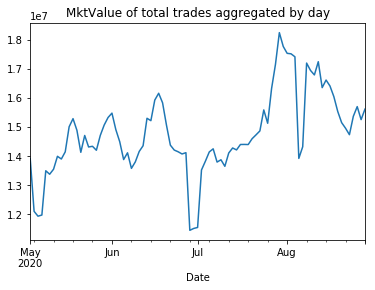

In [15]:
# Trendline for market value 

allData.groupby('Date')['MktValue'].agg('sum').plot()
plt.title('MktValue of total trades aggregated by day')

In [16]:
# Calculating most active clients in terms of mkt value
overallMktVal = np.nansum(allData.MktValue)
allData.groupby('Client ID').apply(lambda x: 
                                   100 * np.nansum(x['MktValue']) / overallMktVal).sort_values(
    ascending = False).head()

Client ID
38    31.606063
74    19.715693
30    13.889284
89     5.987630
44     5.310084
dtype: float64

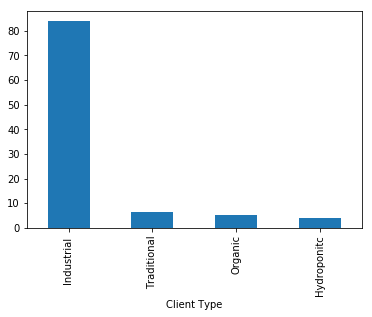

In [17]:
# Breakdown by client type
overallMktVal = np.nansum(allData.MktValue)
allData.groupby('Client Type').apply(lambda x: 
                                   100 * np.nansum(x['MktValue']) / overallMktVal).sort_values(
    ascending = False).plot(kind ='bar')

Text(0.5, 1.0, 'Total Trade by Region')

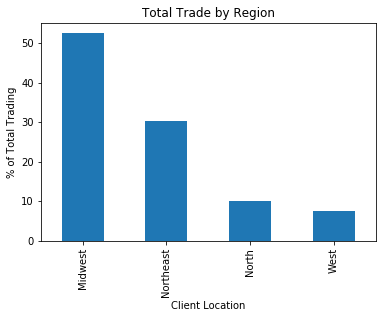

In [18]:
# Breakdown by client region

overallMktVal = np.nansum(allData.MktValue)
allData.groupby('Client Location').apply(lambda x: 
                                   100 * np.nansum(x['MktValue']) / overallMktVal).sort_values(
    ascending = False).plot(kind = 'bar')
plt.ylabel('% of Total Trading')
plt.title('Total Trade by Region')

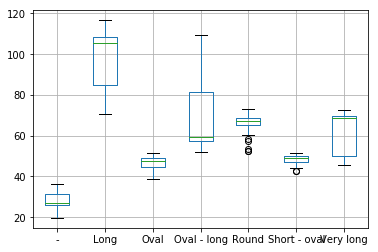

In [19]:
## Exploring factors that might help predict potato prices 

# Boxplot for prices vs shape of tuber
potatoAllData.groupby(['Date','Shape of tuber'])['Price'].agg('mean').unstack(level = 1).boxplot()

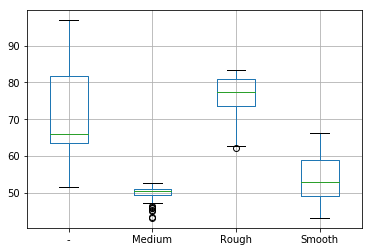

In [20]:
# Boxplot for prices vs smoothness of skin
potatoAllData.groupby(['Date','Smoothness of skin'])['Price'].agg('mean').unstack(level = 1).boxplot()

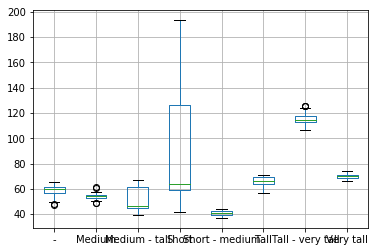

In [21]:
potatoAllData.groupby(['Date','Height of plants'])['Price'].agg('mean').unstack(level = 1).boxplot()

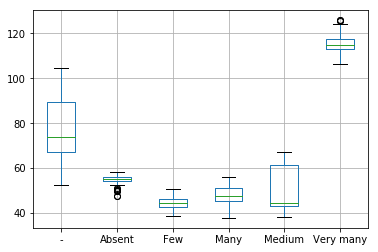

In [22]:
potatoAllData.groupby(['Date','Frequency of berries'])['Price'].agg('mean').unstack(level = 1).boxplot()

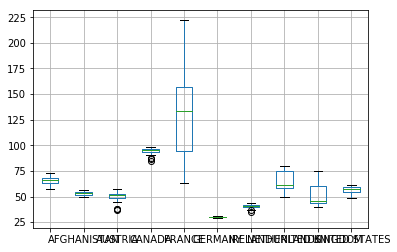

In [23]:
potatoAllData.groupby(['Date','Country'])['Price'].agg('mean').unstack(level = 1).boxplot()